In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2

In [6]:
# Ex 01: Calculating sigmoid
def basic_sigmoid(x):
    s = 1 / (1 + math.exp(-x))
    return s

s = 1
print('Sigmoid of {} = {}'.format(s, basic_sigmoid(s)))

Sigmoid of 1 = 0.7310585786300049


In [11]:
# Ex 02: Sigmoid on array
x = [1, 2, 3]

def sigmoid_naive(x):
    rs = []
    for i in x:
        rs.append(basic_sigmoid(i))
    return rs

def sigmoid(x):
    x = np.array(x)
    y = 1 / (1 + np.exp(-x))
    return y

print(sigmoid(x))

[0.73105858 0.88079708 0.95257413]


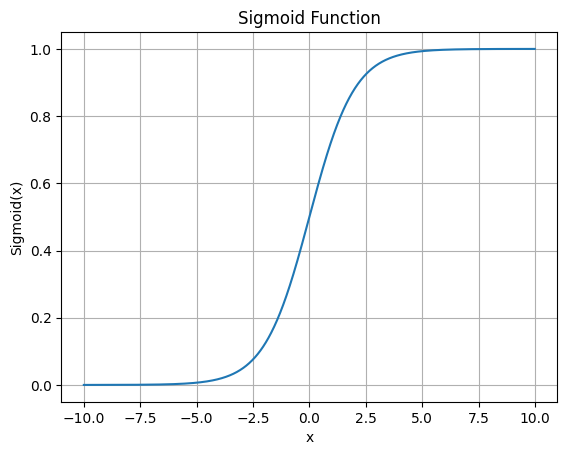

In [31]:
# Bonus: Plotting sigmoid function
x = np.arange(-10, 10, 0.01)
y = sigmoid(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()
